In [1]:
# install.packages("corrplot")
# install.packages("plot3D")
# install.packages("dplyr")

# Disabling the cell warning in the notebook:
# If the warn is set to a negative number, all warnings are ignored
options(warn=-1)
options(message=-1)
# suppressWarnings(Wine_Quality_Analysis_PS1.ipynb)

library(plot3D)
library(corrplot) #For plotting correlation matrix and heatmap
library(dplyr)


corrplot 0.84 loaded

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
library(repr)
# Use repr to resize plot outputs. for more information check the following link
# https://blog.revolutionanalytics.com/2015/09/resizing-plots-in-the-r-kernel-for-jupyter-notebooks.html
# To set the plot width and height to something  e.g. 4 inches wide and 3 inches high, use:
# options(repr.plot.width=4, repr.plot.height=3)

# Wine Quality Data Correlation
In this project we will evaluate data of different wine qualities ranging from 3 - 8 where 3 is the worst quality wine and 8 is the best quality wine in the given dataset.
We will explore the data and try to find if there is any coorelation of wine quality with any other factor like, alcohol content, ph value, density, acitidy etc.

# Get the Data
First we will load the data from the csv file and take a look at the data by printing the first 10 lines

In [3]:
# load the data from csv file
winedata <- read.csv('https://s3.amazonaws.com/preeti.first.boto.s3.bucket/datasets_918_1674_wineQualityReds.csv')
head(winedata,10)

X,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
1,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
2,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
3,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
4,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
5,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
6,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5
7,7.9,0.60,0.06,1.6,0.069,15,59,0.9964,3.30,0.46,9.4,5
8,7.3,0.65,0.00,1.2,0.065,15,21,0.9946,3.39,0.47,10.0,7
9,7.8,0.58,0.02,2.0,0.073,9,18,0.9968,3.36,0.57,9.5,7
10,7.5,0.50,0.36,6.1,0.071,17,102,0.9978,3.35,0.80,10.5,5


To understand the data better we can also describe the dataset structure. 
This will list all the fields of the dataset along with their respective types and a sample of data

In [4]:
str(winedata)

'data.frame':	1599 obs. of  13 variables:
 $ X                   : int  1 2 3 4 5 6 7 8 9 10 ...
 $ fixed.acidity       : num  7.4 7.8 7.8 11.2 7.4 7.4 7.9 7.3 7.8 7.5 ...
 $ volatile.acidity    : num  0.7 0.88 0.76 0.28 0.7 0.66 0.6 0.65 0.58 0.5 ...
 $ citric.acid         : num  0 0 0.04 0.56 0 0 0.06 0 0.02 0.36 ...
 $ residual.sugar      : num  1.9 2.6 2.3 1.9 1.9 1.8 1.6 1.2 2 6.1 ...
 $ chlorides           : num  0.076 0.098 0.092 0.075 0.076 0.075 0.069 0.065 0.073 0.071 ...
 $ free.sulfur.dioxide : num  11 25 15 17 11 13 15 15 9 17 ...
 $ total.sulfur.dioxide: num  34 67 54 60 34 40 59 21 18 102 ...
 $ density             : num  0.998 0.997 0.997 0.998 0.998 ...
 $ pH                  : num  3.51 3.2 3.26 3.16 3.51 3.51 3.3 3.39 3.36 3.35 ...
 $ sulphates           : num  0.56 0.68 0.65 0.58 0.56 0.56 0.46 0.47 0.57 0.8 ...
 $ alcohol             : num  9.4 9.8 9.8 9.8 9.4 9.4 9.4 10 9.5 10.5 ...
 $ quality             : int  5 5 5 6 5 5 5 7 7 5 ...


Since we are finding good quality wines, let's take a look at the data where the quality of wine is 8

In [5]:
wine8 = filter(winedata, winedata$quality == 8)
head(wine8,50)

X,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
268,7.9,0.35,0.46,3.6,0.078,15,37,0.99730,3.35,0.86,12.8,8
279,10.3,0.32,0.45,6.4,0.073,5,13,0.99760,3.23,0.82,12.6,8
391,5.6,0.85,0.05,1.4,0.045,12,88,0.99240,3.56,0.82,12.9,8
441,12.6,0.31,0.72,2.2,0.072,6,29,0.99870,2.88,0.82,9.8,8
456,11.3,0.62,0.67,5.2,0.086,6,19,0.99880,3.22,0.69,13.4,8
482,9.4,0.30,0.56,2.8,0.080,6,17,0.99640,3.15,0.92,11.7,8
496,10.7,0.35,0.53,2.6,0.070,5,16,0.99720,3.15,0.65,11.0,8
499,10.7,0.35,0.53,2.6,0.070,5,16,0.99720,3.15,0.65,11.0,8
589,5.0,0.42,0.24,2.0,0.060,19,50,0.99170,3.72,0.74,14.0,8
829,7.8,0.57,0.09,2.3,0.065,34,45,0.99417,3.46,0.74,12.7,8


# Explore the Data to find Correlartions
Next we will do a simple correlation amongst all the variables of the dataset

In [6]:
winedata.cor = cor(winedata)
winedata.cor

,X,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
X,1.000000000,-0.26848392,-0.008815099,-0.15355136,-0.031260835,-0.119868519,0.090479643,-0.11784967,-0.36837209,0.13600533,-0.125306999,0.24512284,0.06645261
fixed.acidity,-0.268483920,1.00000000,-0.256130895,0.67170343,0.114776724,0.093705186,-0.153794193,-0.11318144,0.66804729,-0.68297819,0.183005664,-0.06166827,0.12405165
volatile.acidity,-0.008815099,-0.25613089,1.000000000,-0.55249568,0.001917882,0.061297772,-0.010503827,0.07647000,0.02202623,0.23493729,-0.260986685,-0.20228803,-0.39055778
citric.acid,-0.153551355,0.67170343,-0.552495685,1.00000000,0.143577162,0.203822914,-0.060978129,0.03553302,0.36494718,-0.54190414,0.312770044,0.10990325,0.22637251
residual.sugar,-0.031260835,0.11477672,0.001917882,0.14357716,1.000000000,0.055609535,0.187048995,0.20302788,0.35528337,-0.08565242,0.005527121,0.04207544,0.01373164
chlorides,-0.119868519,0.09370519,0.061297772,0.20382291,0.055609535,1.000000000,0.005562147,0.04740047,0.20063233,-0.26502613,0.371260481,-0.22114054,-0.12890656
free.sulfur.dioxide,0.090479643,-0.15379419,-0.010503827,-0.06097813,0.187048995,0.005562147,1.000000000,0.66766645,-0.02194583,0.07037750,0.051657572,-0.06940835,-0.05065606
total.sulfur.dioxide,-0.117849669,-0.11318144,0.076470005,0.03553302,0.203027882,0.047400468,0.667666450,1.00000000,0.07126948,-0.06649456,0.042946836,-0.20565394,-0.18510029
density,-0.368372087,0.66804729,0.022026232,0.36494718,0.355283371,0.200632327,-0.021945831,0.07126948,1.00000000,-0.34169933,0.148506412,-0.49617977,-0.17491923
pH,0.136005328,-0.68297819,0.234937294,-0.54190414,-0.085652422,-0.265026131,0.070377499,-0.06649456,-0.34169933,1.00000000,-0.196647602,0.20563251,-0.05773139


We can also visualize this correlation by polotting it as a **Correlogram**. The positive correlations will be shown in a blue scale and all negative correaltions will be shown in red scale. Bigger the size of the bubble higher is the correlation (positive or negative)

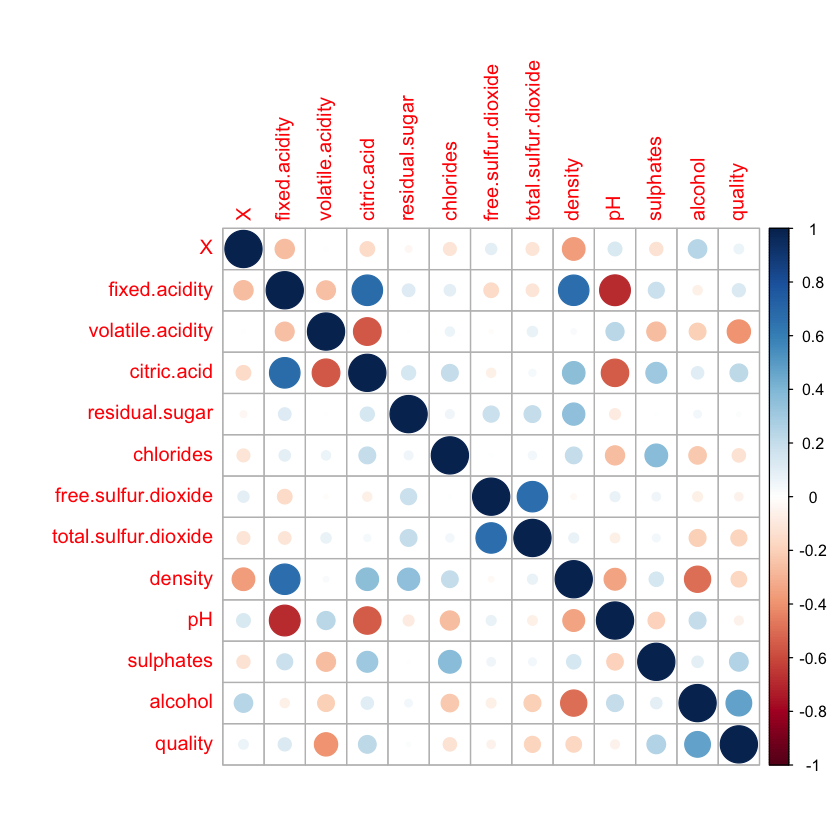

In [7]:
options(repr.plot.width=7, repr.plot.height=7)
corrplot(winedata.cor)

We can also plot a heatmap of correlation data

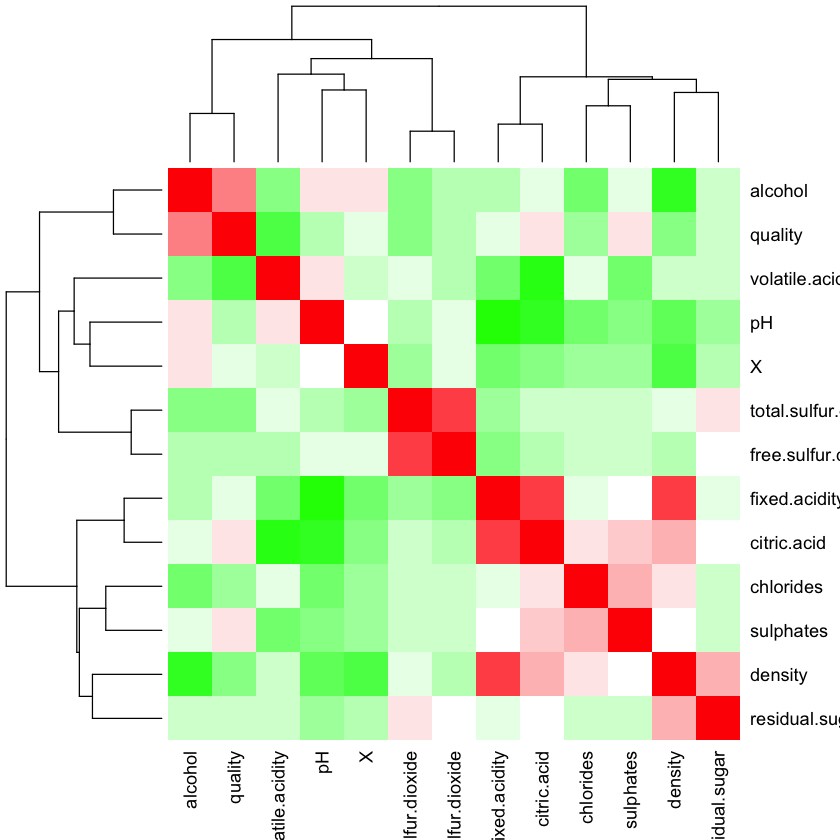

In [8]:
palette = colorRampPalette(c("green", "white", "red")) (25)
heatmap(x = winedata.cor, col = palette, symm = TRUE)

We can clearly see from the above correlation coefficients that the most positive correlated variable with Quaity is Alcohol and the most negative correlated variable with Quality is Volatile Acidity of the wine. 

Let's also look at the summary of these three variables.

### Summary of Quality

In [9]:
summary(winedata$quality)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.000   5.000   6.000   5.636   6.000   8.000 

### Summary of Alcohol

In [10]:
summary(winedata$alcohol)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   8.40    9.50   10.20   10.42   11.10   14.90 

### Summary of Volatile Acidity

In [11]:
summary(winedata$volatile.acidity)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.1200  0.3900  0.5200  0.5278  0.6400  1.5800 

### Plot 3D  Scatter
Now we will plot all three variables - Quaklity, Alcihol and Volatile Acidity together in a 3D scatter plot

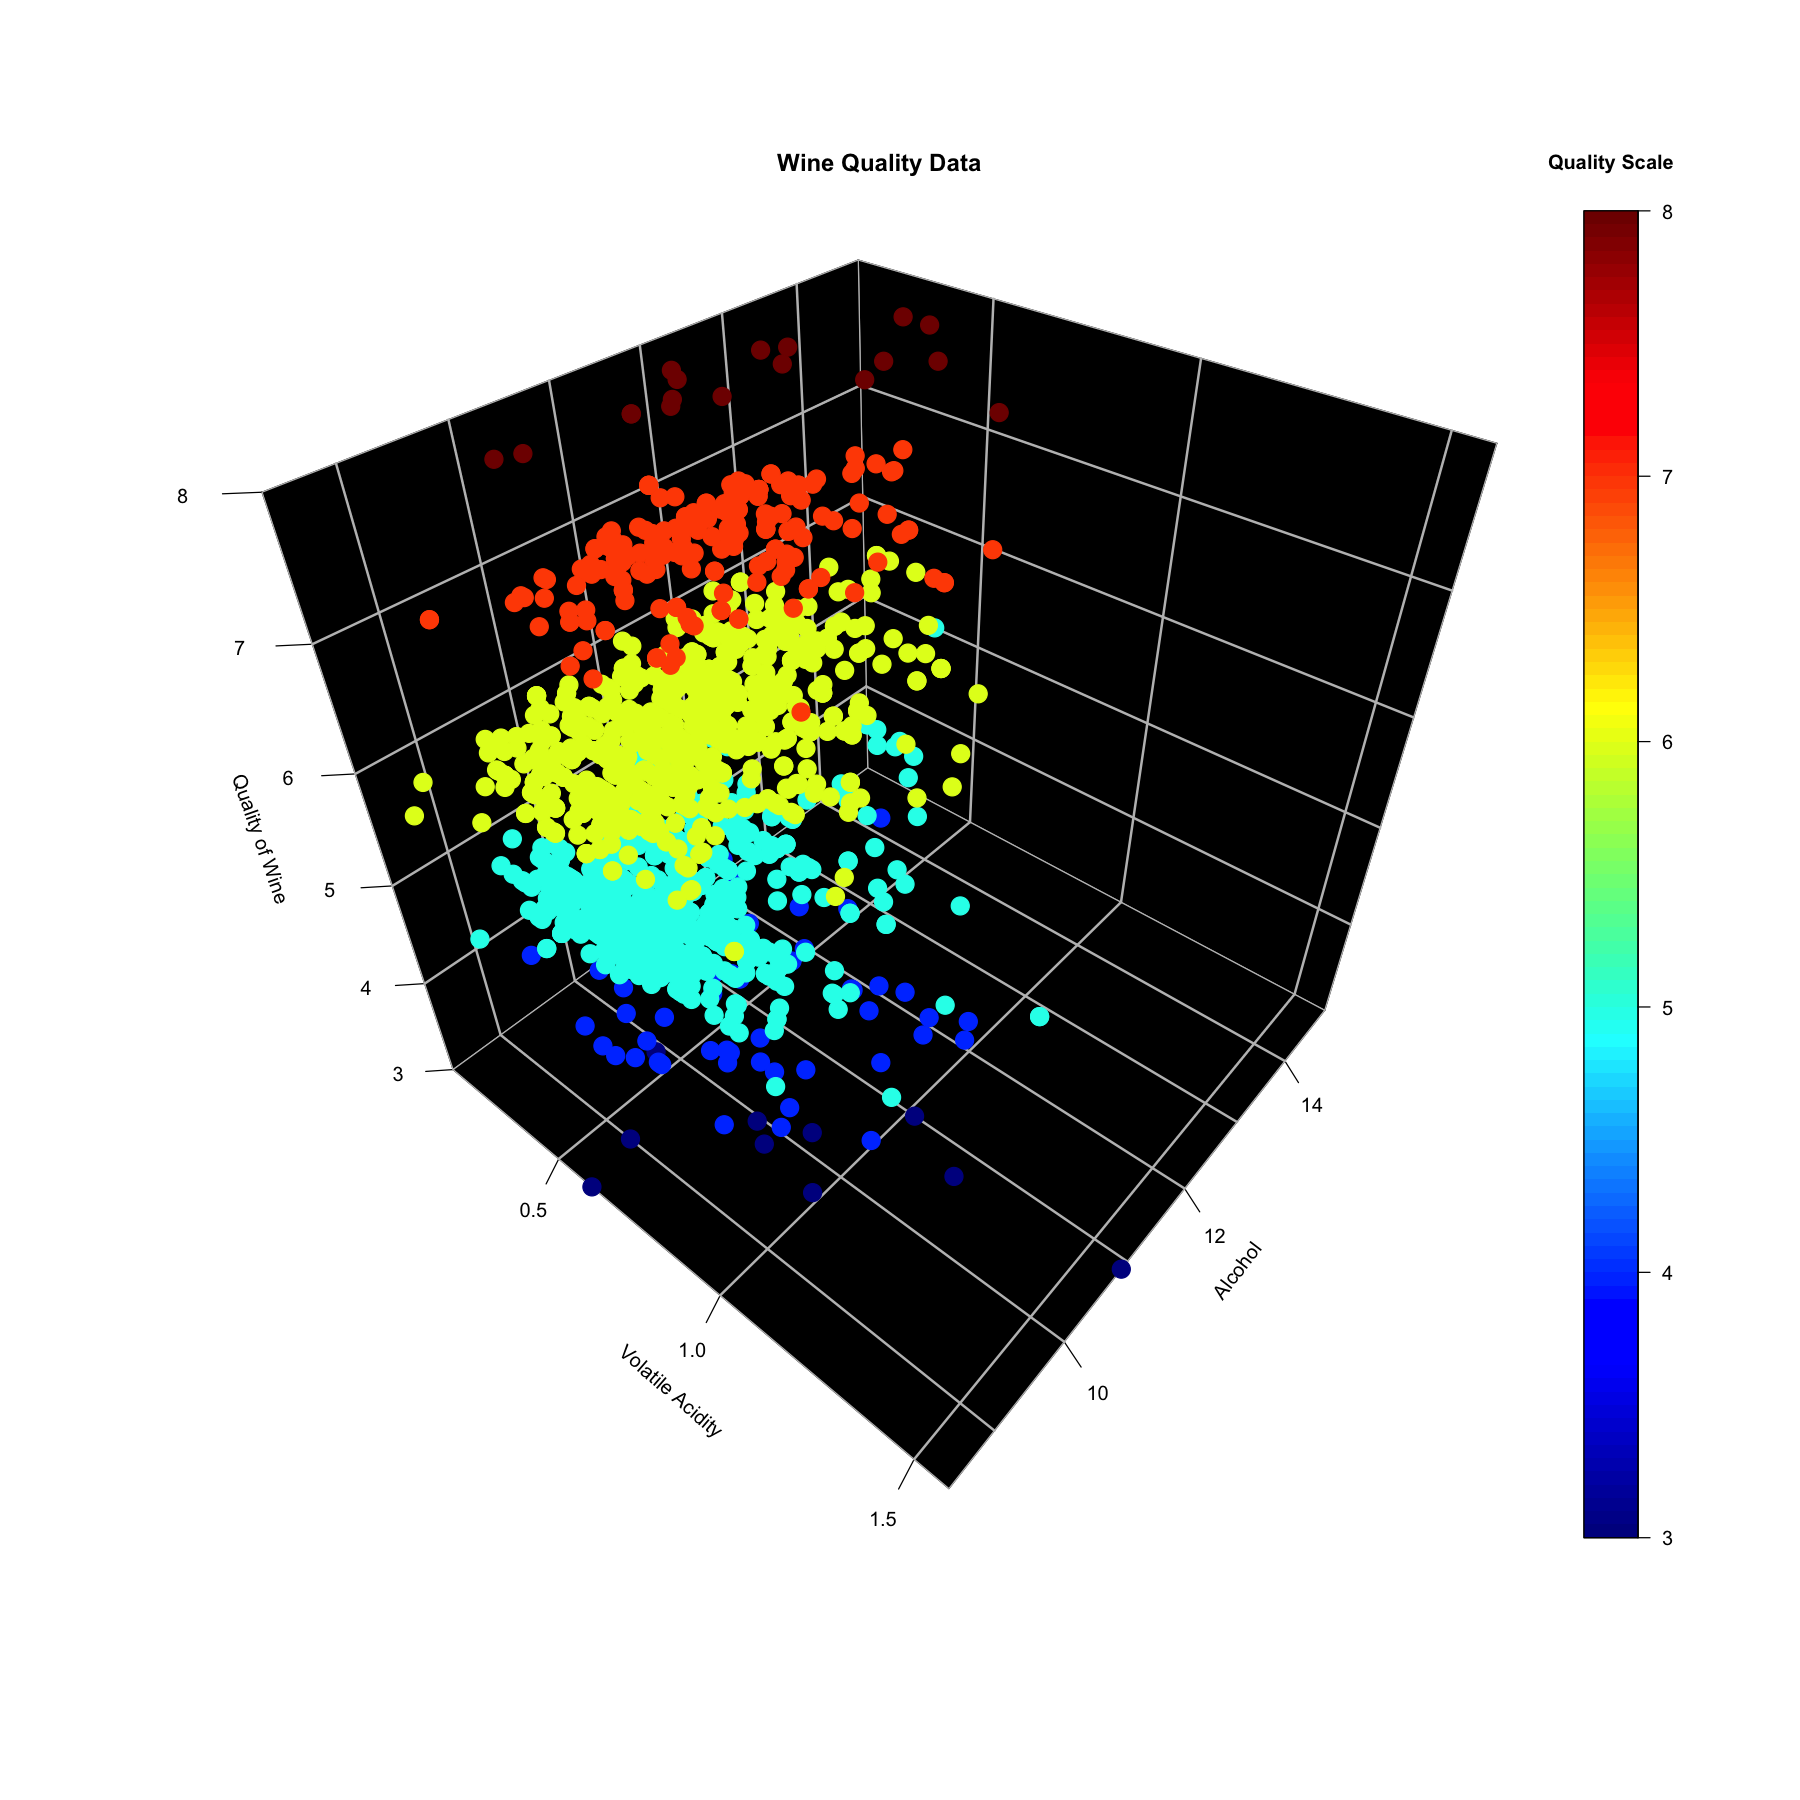

In [12]:
options(repr.plot.width=15, repr.plot.height=15)
scatter3D(winedata$volatile.acidity, winedata$alcohol, winedata$quality, pch = 19, cex = 2, clab = "Quality Scale", 
          bty = 'bl2', main = "Wine Quality Data", ticktype = "detailed",
         xlab = "Volatile Acidity", ylab = "Alcohol", zlab = "Quality of Wine")
#For more details refer to http://www.sthda.com/english/wiki/impressive-package-for-3d-and-4d-graph-r-software-and-data-visualization

In the above 3D scatter plot we can see that all good wines (quality = 8) are concentrated in the area where alcohol content is high and the volatile acidity is low.
In order to confirm if this hypothesis is correct, we will have to do a linear regression to see if the value of R2 is closer to one.(work in progress)